In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount = True)

Mounted at /content/gdrive


In [ ]:
%cd '/content/gdrive/My Drive/LDS8_Le Quang Anh Tu/week2/Chapter3'

/content/gdrive/My Drive/LDS8_Le Quang Anh Tu/week2/Chapter3


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [ ]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
#du lieu
X = df.iloc[:,3:13].values
y = df.iloc[:,13].values

In [ ]:
X[:5]

array([[619, 'France', 'Female', 42, 2, 0.0, 1, 1, 1, 101348.88],
       [608, 'Spain', 'Female', 41, 1, 83807.86, 1, 0, 1, 112542.58],
       [502, 'France', 'Female', 42, 8, 159660.8, 3, 1, 0, 113931.57],
       [699, 'France', 'Female', 39, 1, 0.0, 2, 0, 0, 93826.63],
       [850, 'Spain', 'Female', 43, 2, 125510.82, 1, 1, 1, 79084.1]],
      dtype=object)

In [ ]:
y[:5]

array([1, 0, 1, 0, 0])

In [ ]:
#du lieu co thuoc tinh phan loai, du lieu can phai scale

In [ ]:
#dem du lieu nguoi ra di va o lai, 1 la ra di, 0 la o lai
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [ ]:
#cach de nhin
from scipy.stats import itemfreq
itemfreq(y)

array([[   0, 7963],
       [   1, 2037]])

In [ ]:
#10 khach hang dau tien
X[:10]

array([[619, 'France', 'Female', 42, 2, 0.0, 1, 1, 1, 101348.88],
       [608, 'Spain', 'Female', 41, 1, 83807.86, 1, 0, 1, 112542.58],
       [502, 'France', 'Female', 42, 8, 159660.8, 3, 1, 0, 113931.57],
       [699, 'France', 'Female', 39, 1, 0.0, 2, 0, 0, 93826.63],
       [850, 'Spain', 'Female', 43, 2, 125510.82, 1, 1, 1, 79084.1],
       [645, 'Spain', 'Male', 44, 8, 113755.78, 2, 1, 0, 149756.71],
       [822, 'France', 'Male', 50, 7, 0.0, 2, 1, 1, 10062.8],
       [376, 'Germany', 'Female', 29, 4, 115046.74, 4, 1, 0, 119346.88],
       [501, 'France', 'Male', 44, 4, 142051.07, 2, 0, 1, 74940.5],
       [684, 'France', 'Male', 27, 2, 134603.88, 1, 1, 1, 71725.73]],
      dtype=object)

In [ ]:
#sudung label va onehot de co the luu model lai, get_dummies khong the luu
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer


In [ ]:
labelencoder_X_1 = LabelEncoder()
X[:,1] = labelencoder_X_1.fit_transform(X[:, 1])
labelencoder_X_2 = LabelEncoder()
X[:,2] = labelencoder_X_2.fit_transform(X[:,2])

ct = ColumnTransformer([('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = ct.fit_transform(X.tolist())
#save 3 model

In [ ]:
X[:10]

array([[1.0, 0.0, 0.0, 619, 0, 42, 2, 0.0, 1, 1, 1, 101348.88],
       [0.0, 0.0, 1.0, 608, 0, 41, 1, 83807.86, 1, 0, 1, 112542.58],
       [1.0, 0.0, 0.0, 502, 0, 42, 8, 159660.8, 3, 1, 0, 113931.57],
       [1.0, 0.0, 0.0, 699, 0, 39, 1, 0.0, 2, 0, 0, 93826.63],
       [0.0, 0.0, 1.0, 850, 0, 43, 2, 125510.82, 1, 1, 1, 79084.1],
       [0.0, 0.0, 1.0, 645, 1, 44, 8, 113755.78, 2, 1, 0, 149756.71],
       [1.0, 0.0, 0.0, 822, 1, 50, 7, 0.0, 2, 1, 1, 10062.8],
       [0.0, 1.0, 0.0, 376, 0, 29, 4, 115046.74, 4, 1, 0, 119346.88],
       [1.0, 0.0, 0.0, 501, 1, 44, 4, 142051.07, 2, 0, 1, 74940.5],
       [1.0, 0.0, 0.0, 684, 1, 27, 2, 134603.88, 1, 1, 1, 71725.73]],
      dtype=object)

In [ ]:
X.shape

(10000, 12)

In [ ]:
#vi chi co 3 quoc gia, nen khi tao ma tran OnehotEncoder quoc gia:
#France 1,0,0
#Germany 0,1,0
#Spain 0,0,1
#=> bo di cot dau thi ta se co duoc ma 3 quoc gia
#France 0,0
#Germany 1,0
#Spain 0,1
X = X[:,1:]


In [ ]:
X[:5]

array([[0.0, 0.0, 619, 0, 42, 2, 0.0, 1, 1, 1, 101348.88],
       [0.0, 1.0, 608, 0, 41, 1, 83807.86, 1, 0, 1, 112542.58],
       [0.0, 0.0, 502, 0, 42, 8, 159660.8, 3, 1, 0, 113931.57],
       [0.0, 0.0, 699, 0, 39, 1, 0.0, 2, 0, 0, 93826.63],
       [0.0, 1.0, 850, 0, 43, 2, 125510.82, 1, 1, 1, 79084.1]],
      dtype=object)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

#save model standard scaler
import pickle
scalerfile = 'sc.sav'
pickle.dump(sc, open(scalerfile, 'wb'))

In [ ]:
X.shape

(10000, 11)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [ ]:
X.shape

(10000, 11)

**Xay dung ANN**

In [ ]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import Sequential

In [ ]:
classifier = Sequential()

* Khoi tao ann su dung keras Sequential dat ten la classifier
* Tao mot dense input layer voi output dim = 6,( 11inputs + 1 out)/2
* Activation : relu (Ap dung cho input va cac hidenlayer)
* input_shape = (11,) (co independent input variables trong X matrix)
* => add vao hidden layer su dung classifier.add()



In [ ]:
#add the input layer and the first hidden layer
classifier.add(Dense(units = 6, activation='relu', input_shape=(11,)))
classifier.add(Dropout(rate=0.1))

In [ ]:
#tao dense hidden layer tiep theo voi cung tham so ma khong can input dim(chi can khai bao inputdim owr input layer) => add vao hidden
classifier.add(Dense(units = 6, activation='relu'))
classifier.add(Dropout(rate=0.1))

In [ ]:
#them output layer
classifier.add(Dense(units = 1, activation='sigmoid'))

In [ ]:
#compile nerual network su dung adam optimizer, binary_crossentropy loss func cho accuracy metric
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 72        
_________________________________________________________________
dropout (Dropout)            (None, 6)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dropout_1 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image

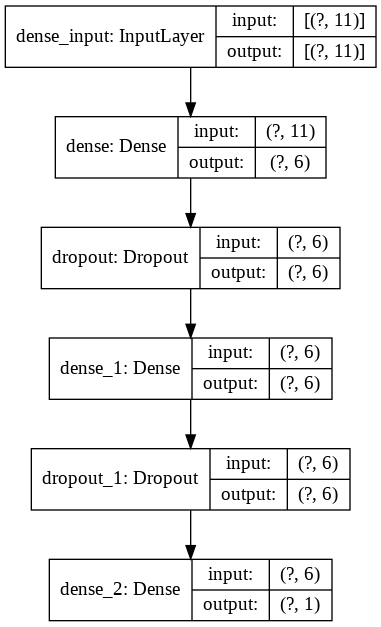

In [ ]:
plot_model(classifier, to_file='ANN_model.png', show_shapes=True)
Image(filename='ANN_model.png')

In [ ]:
X_test.shape

(2000, 11)

In [ ]:
#fitting classifier to the training  test
history = classifier.fit(X_train, y_train, epochs=100, batch_size = 64, validation_data=(X_test, y_test))

Epoch 1/100
125/125 [==============================] - 0s 4ms/step - loss: 0.6601 - accuracy: 0.6546 - val_loss: 0.5789 - val_accuracy: 0.7965
Epoch 2/100
125/125 [==============================] - 0s 2ms/step - loss: 0.5490 - accuracy: 0.7964 - val_loss: 0.4927 - val_accuracy: 0.8025
Epoch 3/100
125/125 [==============================] - 0s 2ms/step - loss: 0.4898 - accuracy: 0.8010 - val_loss: 0.4564 - val_accuracy: 0.8065
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 0.4705 - accuracy: 0.8031 - val_loss: 0.4407 - val_accuracy: 0.8100
Epoch 5/100
125/125 [==============================] - 0s 2ms/step - loss: 0.4557 - accuracy: 0.8048 - val_loss: 0.4309 - val_accuracy: 0.8140
Epoch 6/100
125/125 [==============================] - 0s 2ms/step - loss: 0.4477 - accuracy: 0.8056 - val_loss: 0.4254 - val_accuracy: 0.8150
Epoch 7/100
125/125 [==============================] - 0s 3ms/step - loss: 0.4395 - accuracy: 0.8077 - val_loss: 0.4207 - val_accuracy: 0.8160

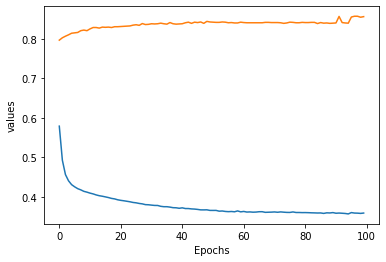

In [ ]:
plt.figure()
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('values')
plt.show()

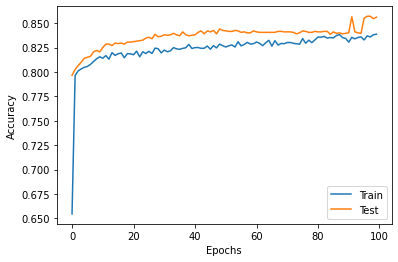

In [ ]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()

In [ ]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
def build_classifier(optimizer):
  classifier = Sequential()
  #add the input layer and the first hidden layer
  classifier.add(Dense(units = 6, activation='relu', input_shape=(11,)))
  classifier.add(Dropout(rate=0.1))
  #tao dense hidden layer tiep theo voi cung tham so ma khong can input dim(chi can khai bao inputdim owr input layer) => add vao hidden
  classifier.add(Dense(units = 6, activation='relu'))
  classifier.add(Dropout(rate=0.1))
  #them output layer
  classifier.add(Dense(units = 1, activation='sigmoid'))
  #compile nerual network su dung adam optimizer, binary_crossentropy loss func cho accuracy metric
  classifier.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
  return classifier

In [ ]:
classifier = KerasClassifier(build_fn=build_classifier)
#dinh nghia tham so trong GridSearchCV
parameters = {'batch_size': [32,64,128],
              'epochs': [100,200,300],
              'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator=classifier, param_grid=parameters, scoring='accuracy', cv=10)
grid_search = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

Epoch 1/100
225/225 [==============================] - 0s 2ms/step - loss: 0.7824 - accuracy: 0.5651
Epoch 2/100
225/225 [==============================] - 0s 2ms/step - loss: 0.5339 - accuracy: 0.7860
Epoch 3/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4959 - accuracy: 0.7932
Epoch 4/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4731 - accuracy: 0.7971
Epoch 5/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4540 - accuracy: 0.8054
Epoch 6/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4386 - accuracy: 0.8114
Epoch 7/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4280 - accuracy: 0.8178
Epoch 8/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4159 - accuracy: 0.8258
Epoch 9/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4085 - accuracy: 0.8328
Epoch 10/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4016 - accura

In [ ]:
from keras.preprocessing.text import one_hot
from keras.preprocessing.text import text_to_word_sequence

text = 'One hot encoding in Keras one'
tokens = text_to_word_sequence(text)
length = len(tokens)
one_hot(text, 10)

[6, 4, 1, 9, 2, 6]

In [ ]:
print(tokens)

['one', 'hot', 'encoding', 'in', 'keras']
